In [1]:
import pandas as pd

data loading

In [2]:
df=pd.read_csv('/content/train.csv')
tdf=pd.read_csv('/content/test.csv')

In [3]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


data shape

In [4]:
df.shape

(7352, 563)

In [5]:
tdf.shape

(2947, 563)

In [6]:
import re

In [7]:
pattern = r"^(tBodyAcc-|tBodyGyro-|fBodyGyro-|fBodyAcc-)"
filtered_lines = [line for line in df.columns if re.match(pattern, line)]

In [8]:
df=df[filtered_lines+['subject','Activity']]
tdf=tdf[filtered_lines+['subject','Activity']]

columns names

In [9]:
feat=['energy()',
 'entropy()',
 'iqr()',
 'mad()',
 'max()',
 'mean()',
 'min()',
 'std()']

In [10]:
def remove_outliers(df, columns, threshold=1.5):

    cleaned_df = df.copy()

    for column in columns:
        # Calculate IQR for the column
        Q1 = cleaned_df[column].quantile(0.01)
        Q3 = cleaned_df[column].quantile(0.99)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove rows with values outside the bounds
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df


cleaned_df = remove_outliers(df, columns=df.columns[:-1], threshold=1.5)
cleaned_tdf = remove_outliers(tdf, columns=df.columns[:-1], threshold=1.5)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

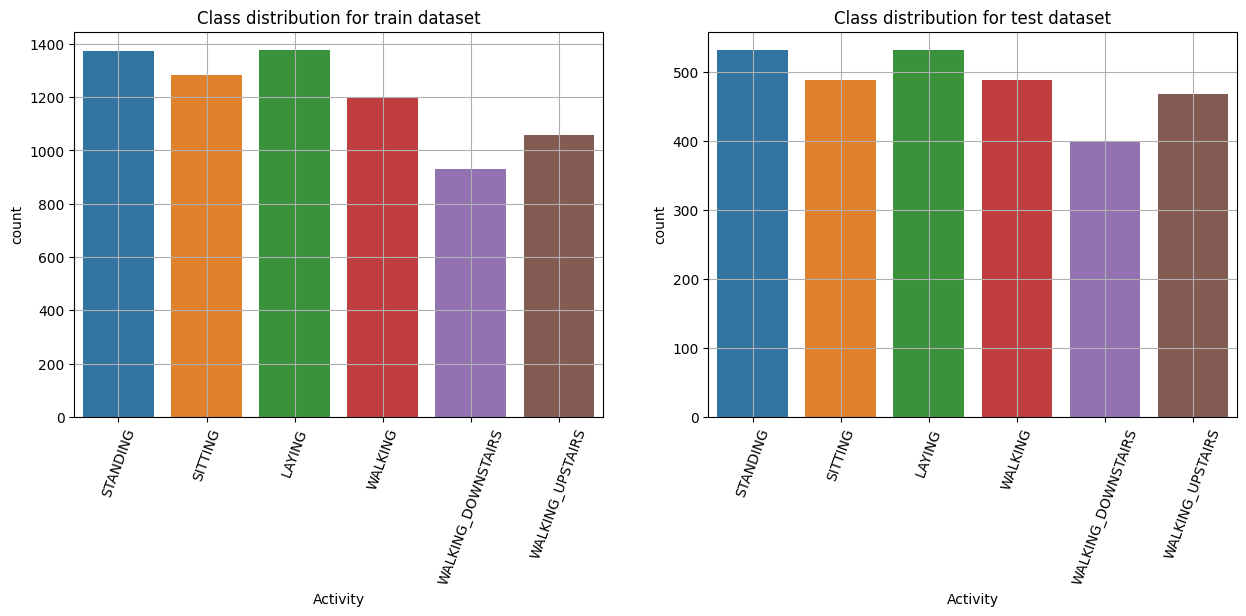

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121),plt.title('Class distribution for train dataset'),sns.countplot(x='Activity', data=cleaned_df),plt.grid(),plt.xticks(rotation=70)
plt.subplot(122),plt.title('Class distribution for test dataset'),sns.countplot(x='Activity', data=cleaned_tdf),plt.grid(),plt.xticks(rotation=70)
plt.show()

visualization tBodyAcc- tBodyGyro- fBodyGyro- fBodyAcc-

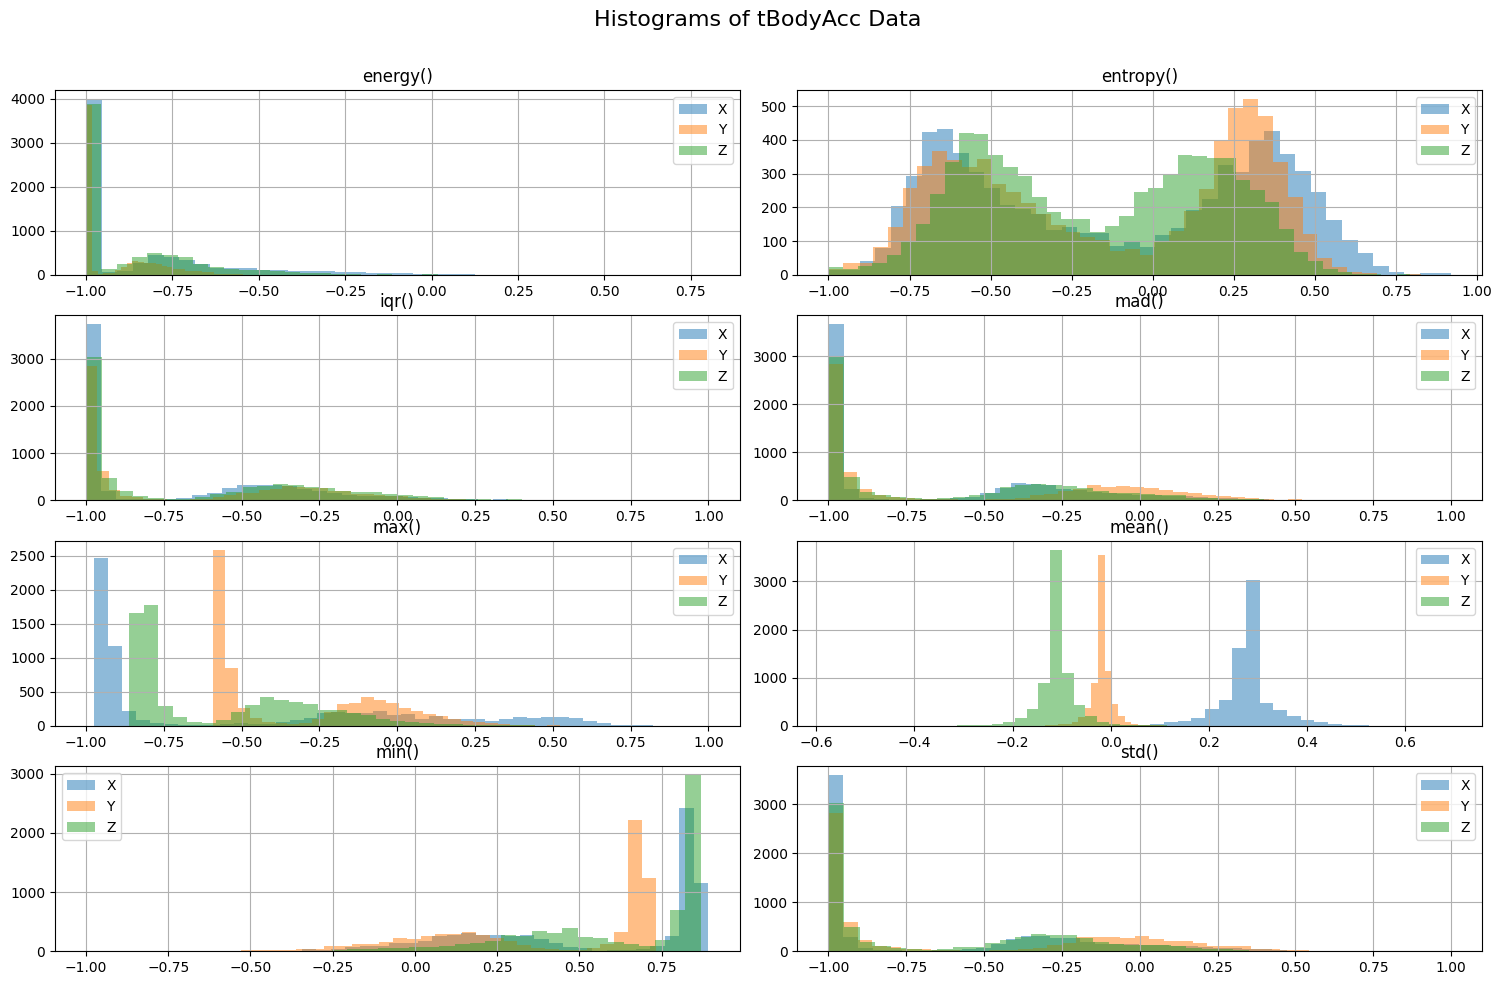

In [13]:
features=['energy()',
 'entropy()',
 'iqr()',
 'mad()',
 'max()',
 'mean()',
 'min()',
 'std()']

def visualization(sensor):
  num_rows = 4
  num_cols = 2

  # Create a new figure with subplots
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
  fig.tight_layout()
  fig.suptitle(f'Histograms of {sensor[:-1]} Data', fontsize=16)
  plt.subplots_adjust(top=0.9)
  # Iterate over the names_between_dashes list
  for i, column_name in enumerate(features[:8]):
      # Calculate the current row and column for the subplot
      row = i // num_cols
      col = i % num_cols

      # Set the title for the subplot
      axes[row, col].set_title(column_name)

      # Plot histograms for X, Y, and Z in the current subplot
      axes[row, col].hist(cleaned_df[sensor + column_name + '-X'], alpha=0.5, label='X',bins=40)
      axes[row, col].hist(cleaned_df[sensor + column_name + '-Y'], alpha=0.5, label='Y',bins=40)
      axes[row, col].hist(cleaned_df[sensor + column_name + '-Z'], alpha=0.5, label='Z',bins=40)

      # Add a legend, grid, and show the subplot
      axes[row, col].legend()
      axes[row, col].grid()

  # Show the subplots
  plt.show()

visualization('tBodyAcc-')

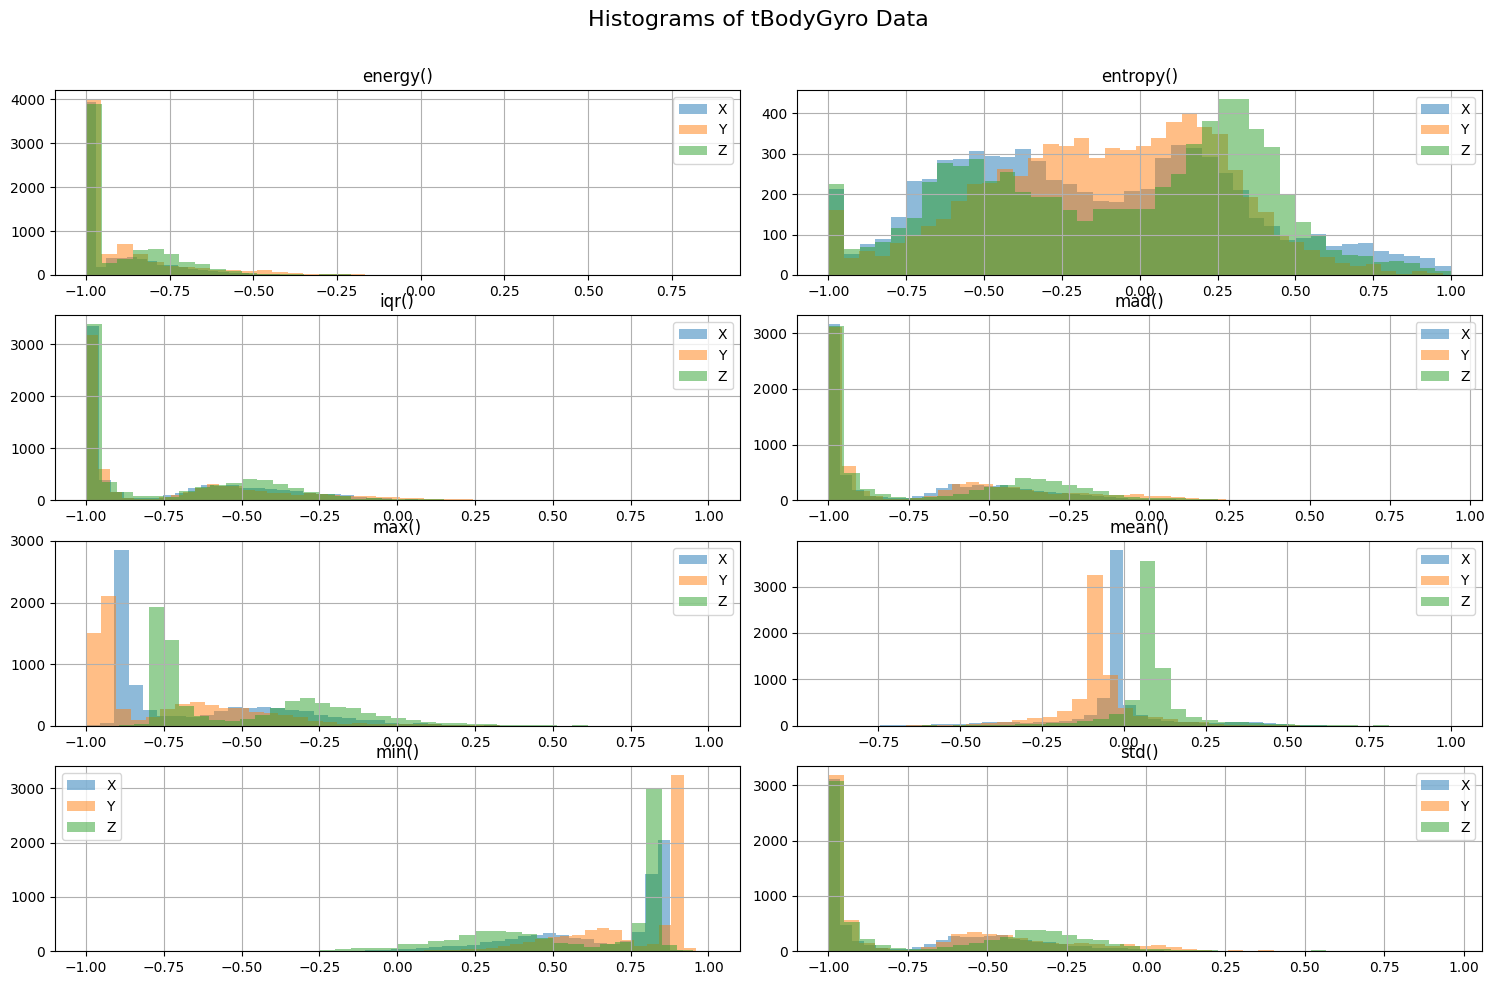

In [14]:
visualization('tBodyGyro-')

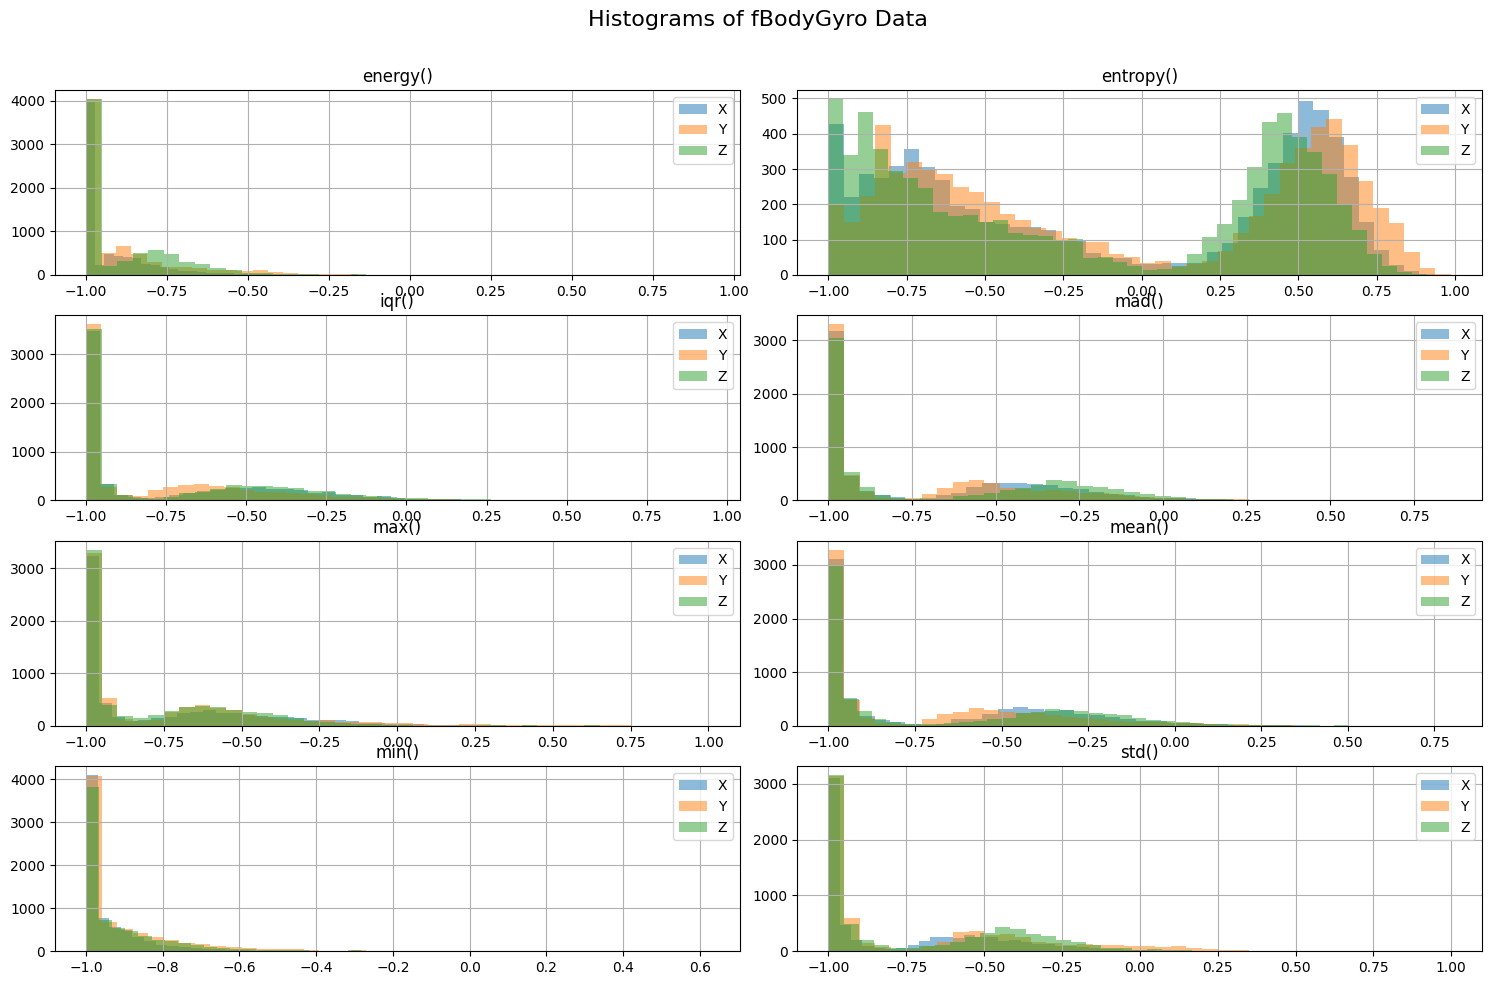

In [15]:
visualization('fBodyGyro-')

<Axes: >

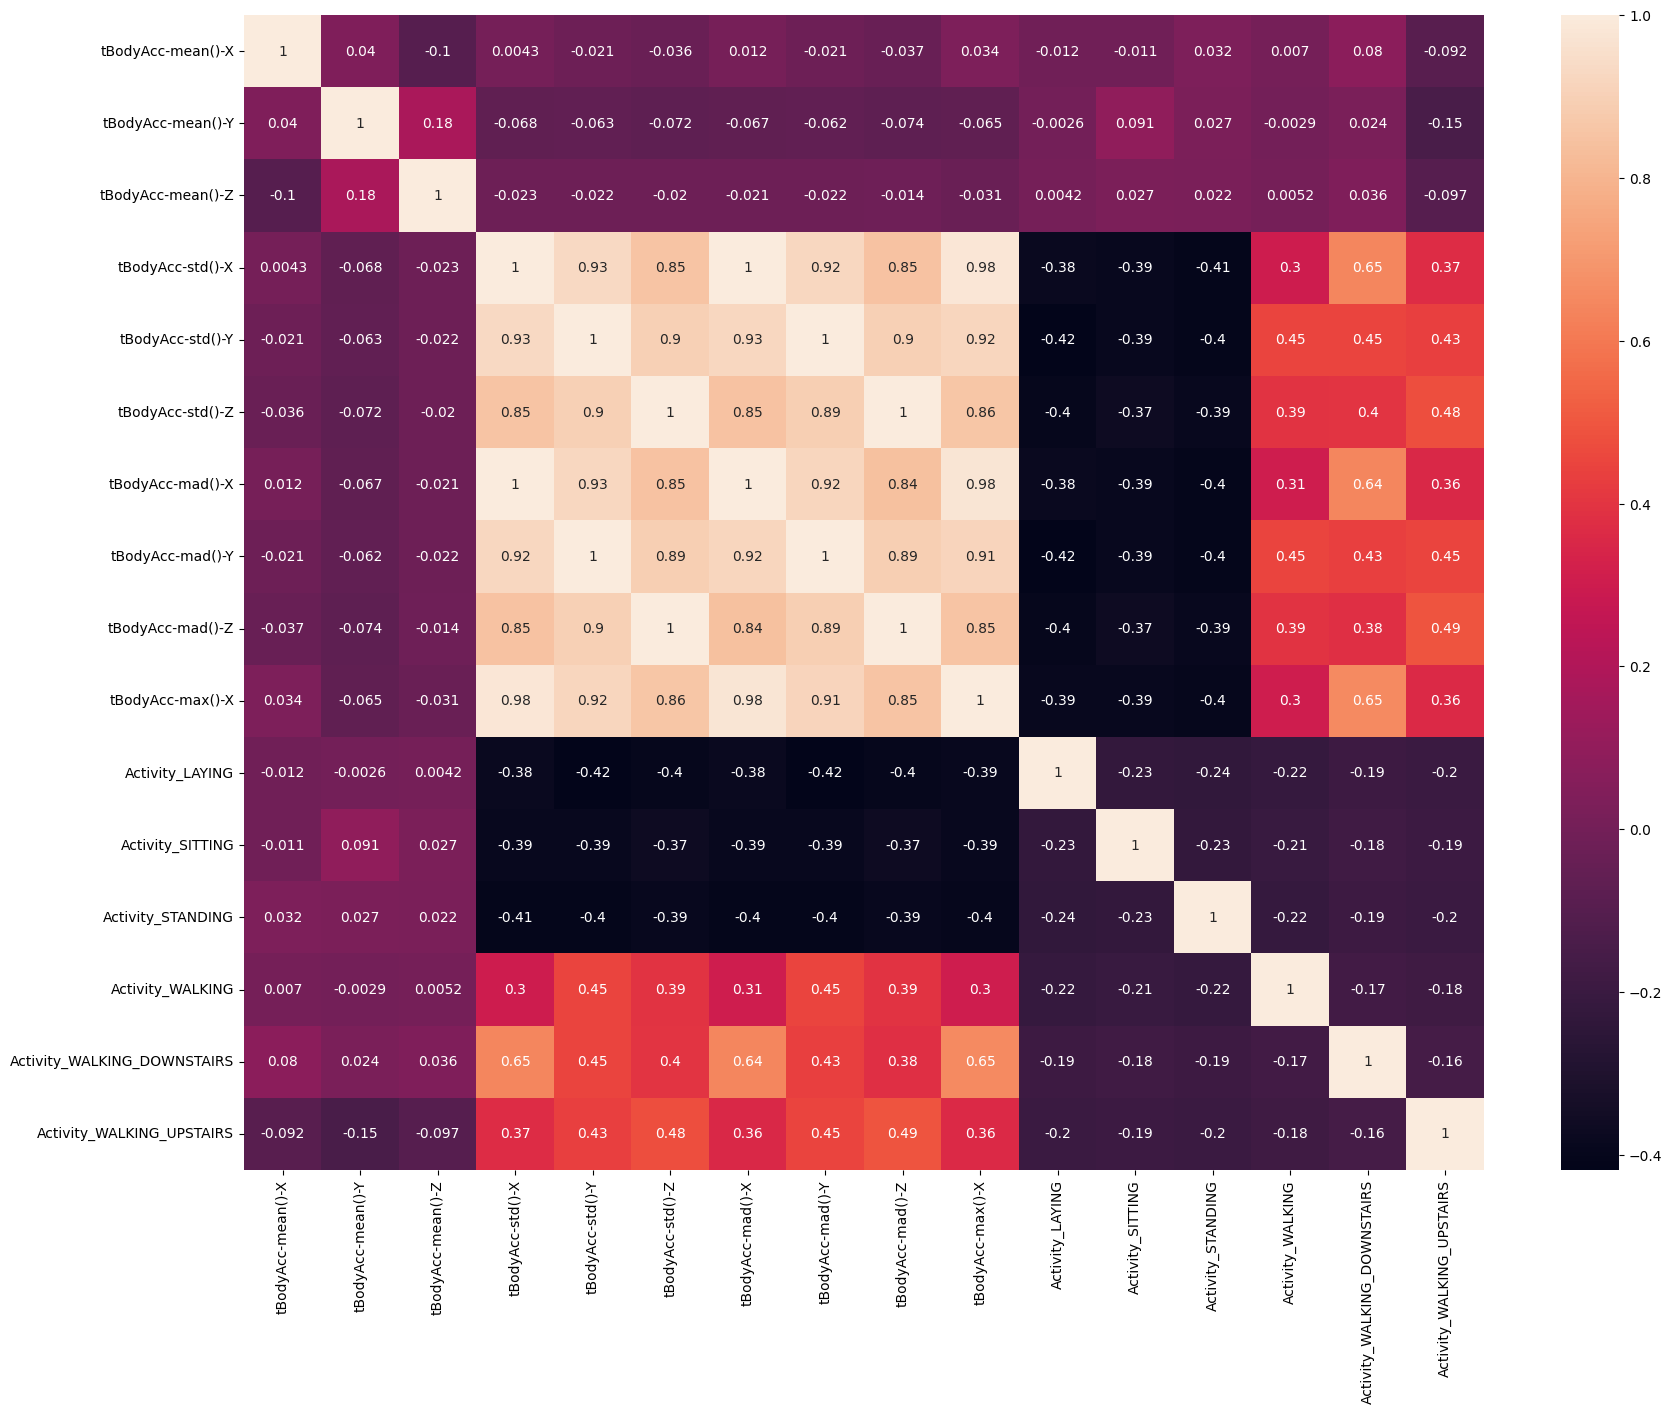

In [16]:
first_20_features = cleaned_df.iloc[:, :10]
last_7_features = pd.get_dummies(cleaned_df).iloc[:, -6:]

# Об'єднання вибраних ознак в один DataFrame
selected_features = pd.concat([first_20_features, last_7_features], axis=1)

# Побудова кореляційної матриці
correlation_matrix = selected_features.corr()
plt.figure(figsize=(20,15))
# Вивід кореляційної матриці
sns.heatmap(correlation_matrix,annot=True)

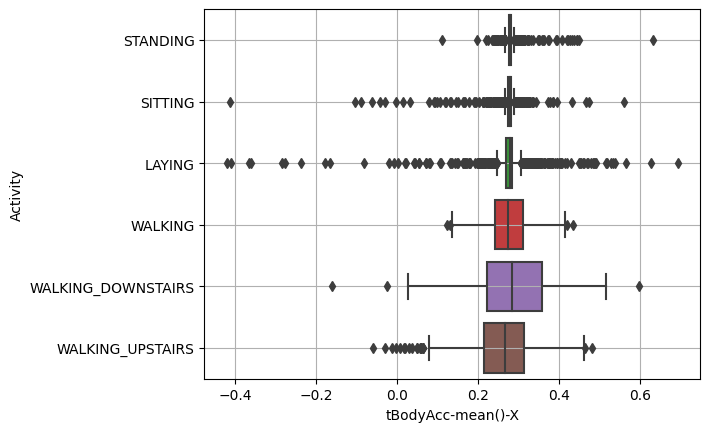

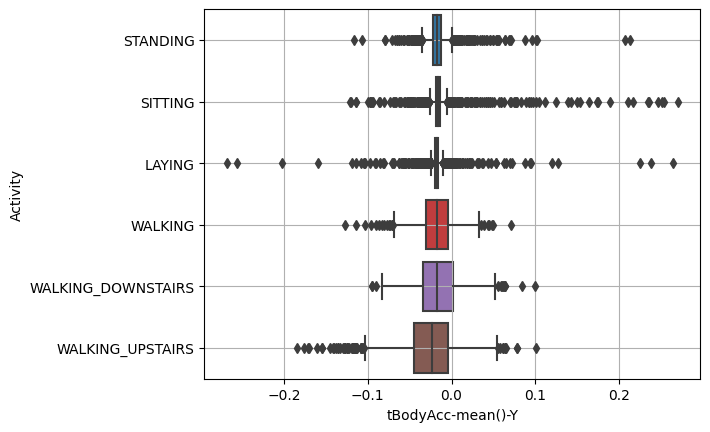

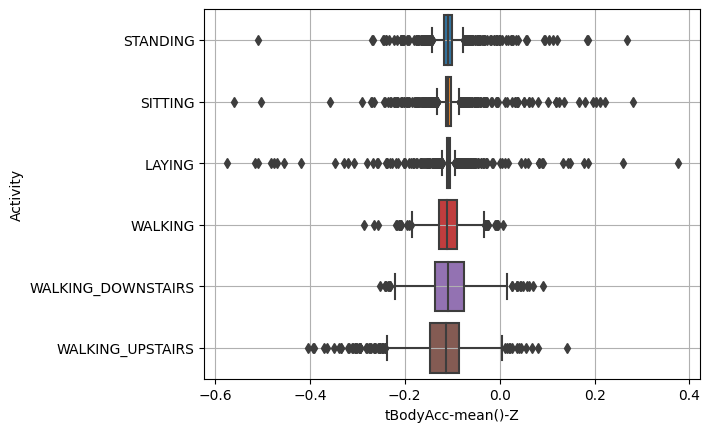

In [17]:
for i in df.columns[:3]:
  sns.boxplot(data=cleaned_df, x=i, y="Activity")
  plt.grid()
  plt.show()

In [18]:
from sklearn import preprocessing

y_train = cleaned_df['Activity'].copy()
X_train = cleaned_df.drop(['Activity'], axis=1).copy()
y_test = cleaned_tdf['Activity'].copy()
X_test = cleaned_tdf.drop(['Activity'], axis=1).copy()

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
label_encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [21]:
g = GridSearchCV(KNeighborsClassifier(), { "n_neighbors" : [13,15] })
g.fit(X_train, y_train)
print(classification_report(y_test, g.predict(X_test),target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

            LAYING       0.92      0.70      0.79       532
           SITTING       0.67      0.64      0.66       489
          STANDING       0.70      0.90      0.79       532
           WALKING       0.71      0.98      0.83       489
WALKING_DOWNSTAIRS       0.95      0.61      0.74       400
  WALKING_UPSTAIRS       0.89      0.82      0.85       468

          accuracy                           0.78      2910
         macro avg       0.81      0.77      0.78      2910
      weighted avg       0.80      0.78      0.78      2910



In [22]:
g.best_params_

{'n_neighbors': 13}

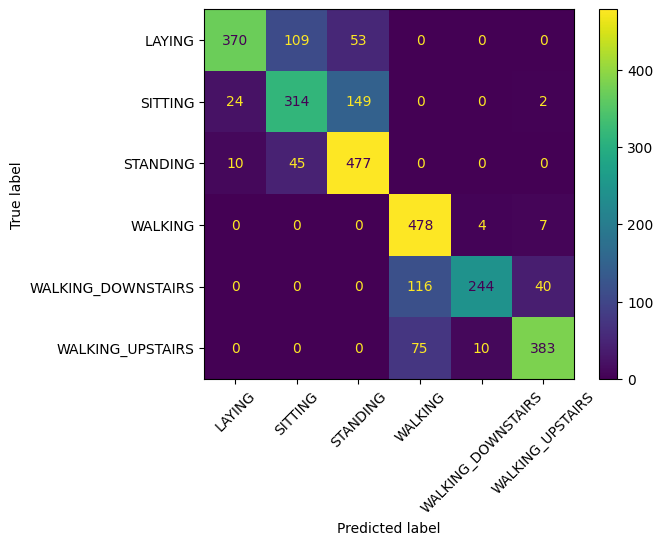

In [23]:
cm = confusion_matrix(y_test, g.predict(X_test), labels=g.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.xticks(rotation = 45)
plt.show()

In [24]:
param_grid = {'C': [100],
              'gamma': [0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']})

In [25]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [26]:
print(classification_report(y_test, grid.predict(X_test),target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

            LAYING       0.92      0.89      0.90       532
           SITTING       0.87      0.83      0.85       489
          STANDING       0.86      0.93      0.89       532
           WALKING       0.94      0.97      0.95       489
WALKING_DOWNSTAIRS       0.99      0.91      0.95       400
  WALKING_UPSTAIRS       0.93      0.95      0.94       468

          accuracy                           0.91      2910
         macro avg       0.92      0.91      0.91      2910
      weighted avg       0.91      0.91      0.91      2910



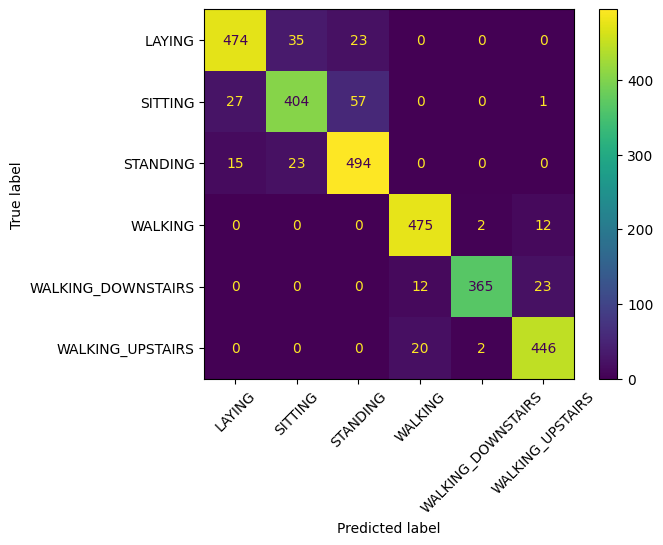

In [27]:
cm = confusion_matrix(y_test, grid.predict(X_test), labels=g.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.xticks(rotation = 45)
plt.show()

In [28]:
from sklearn import tree
import numpy as np

clf = tree.DecisionTreeClassifier()
param_grid = { 'criterion':['entropy'],'max_depth': np.arange(14, 15)}
dtree_gscv = GridSearchCV(clf, param_grid)
dtree_gscv.fit(X_train, y_train)
print(classification_report(y_test, dtree_gscv.predict(X_test),target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

            LAYING       0.79      0.75      0.77       532
           SITTING       0.67      0.70      0.69       489
          STANDING       0.75      0.75      0.75       532
           WALKING       0.78      0.81      0.79       489
WALKING_DOWNSTAIRS       0.80      0.74      0.77       400
  WALKING_UPSTAIRS       0.77      0.79      0.78       468

          accuracy                           0.76      2910
         macro avg       0.76      0.76      0.76      2910
      weighted avg       0.76      0.76      0.76      2910



In [29]:
dtree_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 14}

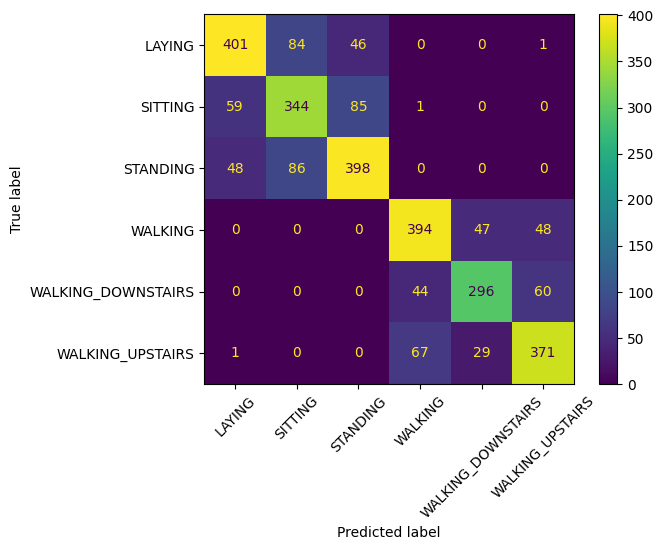

In [30]:
cm = confusion_matrix(y_test, dtree_gscv.predict(X_test), labels=g.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.xticks(rotation = 45)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
param_grid = {
    'n_estimators': [500],
    'max_features': ['log2'],
    'max_depth' : [6,8],
    'criterion' :['gini']
}
CV_rfc = GridSearchCV(estimator=clf2, param_grid=param_grid)
CV_rfc.fit(X_train[:500], y_train[:500])
print(classification_report(y_test, CV_rfc.predict(X_test),target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

            LAYING       0.85      0.61      0.71       532
           SITTING       0.75      0.51      0.61       489
          STANDING       0.59      0.92      0.72       532
           WALKING       0.67      0.71      0.69       489
WALKING_DOWNSTAIRS       0.68      0.79      0.73       400
  WALKING_UPSTAIRS       0.76      0.62      0.68       468

          accuracy                           0.69      2910
         macro avg       0.72      0.69      0.69      2910
      weighted avg       0.72      0.69      0.69      2910



In [32]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [33]:
clf2 = RandomForestClassifier(**CV_rfc.best_params_)
clf2.fit(X_train, y_train)
print(classification_report(y_test, CV_rfc.predict(X_test),target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

            LAYING       0.85      0.61      0.71       532
           SITTING       0.75      0.51      0.61       489
          STANDING       0.59      0.92      0.72       532
           WALKING       0.67      0.71      0.69       489
WALKING_DOWNSTAIRS       0.68      0.79      0.73       400
  WALKING_UPSTAIRS       0.76      0.62      0.68       468

          accuracy                           0.69      2910
         macro avg       0.72      0.69      0.69      2910
      weighted avg       0.72      0.69      0.69      2910



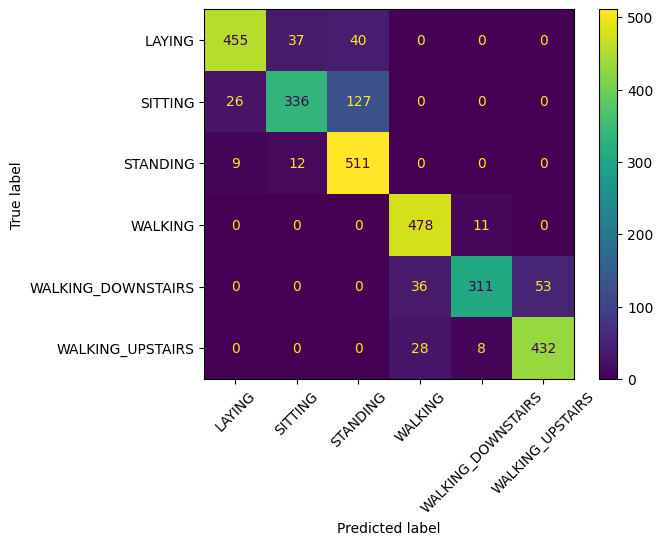

In [34]:
cm = confusion_matrix(y_test, clf2.predict(X_test), labels=g.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.xticks(rotation = 45)
plt.show()

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

adaBoostClassifier = AdaBoostClassifier(n_estimators=5,estimator = SVC(probability=True,**grid.best_params_))
adaBoostClassifier.fit(X_train,y_train)

AdaBoostClassifier(estimator=SVC(C=100, gamma=0.001, probability=True),
                   n_estimators=5)

In [36]:
print(classification_report(y_test, adaBoostClassifier.predict(X_test),target_names=label_encoder.classes_))

                    precision    recall  f1-score   support

            LAYING       0.86      0.73      0.79       532
           SITTING       0.64      0.62      0.63       489
          STANDING       0.73      0.84      0.78       532
           WALKING       0.93      0.88      0.90       489
WALKING_DOWNSTAIRS       0.86      0.70      0.77       400
  WALKING_UPSTAIRS       0.80      0.97      0.87       468

          accuracy                           0.79      2910
         macro avg       0.80      0.79      0.79      2910
      weighted avg       0.80      0.79      0.79      2910



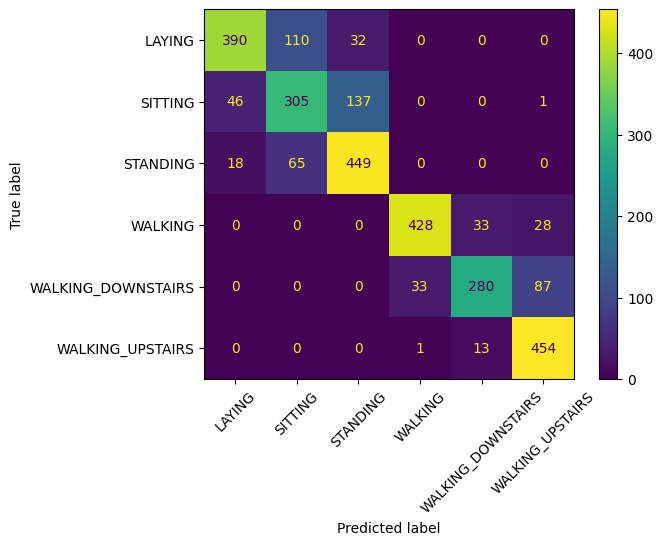

In [37]:
cm = confusion_matrix(y_test, adaBoostClassifier.predict(X_test), labels=g.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.xticks(rotation = 45)
plt.show()